# Episode 3: Backtesting our Bot we created in Episode 2. 

### Step 1: Set Up
import libraries “We’re importing the same tools we’ve used — for data, math, and plotting results.”

In [1]:
import yfinance as yf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

### Step 2: Download Data + Calculate RSI
(Reuse the RSI calculation from Episode 2)
We calculate RSI again — this will power our Buy/Sell signals.”

In [3]:
data = yf.download('AAPL', start='2022-01-01', end='2023-01-01')


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0).rolling(window=period).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

data['RSI'] = calculate_rsi(data['Close'])

### Step 3: Create Buy/Sell Signals
Now we simulate the bot — buy when RSI is low, sell when it’s high.
We shift the signal forward so the trade happens after the signal appears.

In [7]:
data['Signal'] = 0
data.loc[data['RSI'] < 30, 'Signal'] = 1  # Buy
data.loc[data['RSI'] > 70, 'Signal'] = -1  # Sell
data['Position'] = data['Signal'].shift()

### Step 4: Calculate Strategy Returns
Now here instead of creating the Buy/Sell Signals as we did in episode 2 in this is, we will now calculate returns: such as: 
Market return and stratgey return. 
 * Market Return: on how much the stock moved
 * Strategy Return: how much our bot would gain or lose, based on its position

In [10]:
data['Market Return'] = data['Close'].pct_change()
data['Strategy Return'] = data['Market Return'] * data['Position']

### Step 5: Plot Strategy vs Market
We plot total performance over time.
This shows whether our RSI bot did better than simply holding the stock


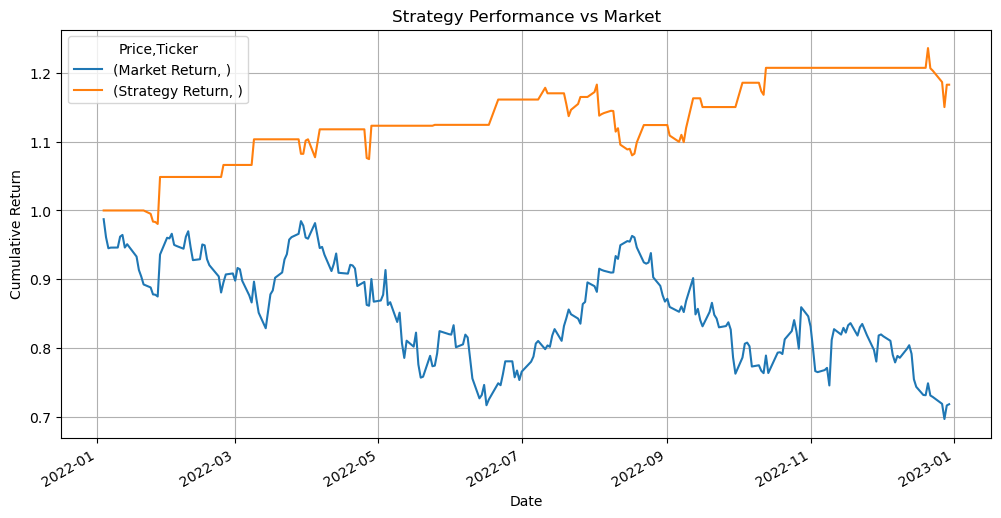

In [27]:
(1 + data[['Market Return', 'Strategy Return']]).cumprod().plot(figsize=(12,6))
plt.title('Strategy Performance vs Market')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid()
plt.show()

### THE END 

THANK YOU FOR WATCH PLEASE LIKE, SUBSCRIBE. 